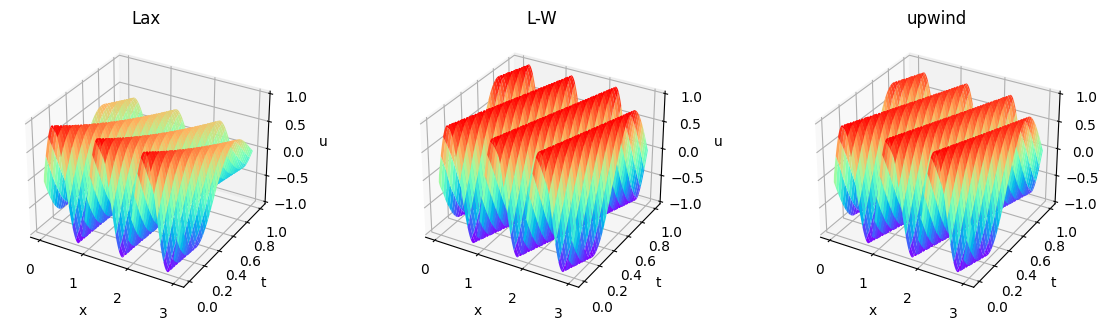

[0.22829084971678926, 0.05731792604254302, 0.02869962947979033]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def wave_equation(dx, dt,tmax,showimage):
#     print("dx dt:",dx,dt)
    # 设置计算参数
    x = np.arange(0, 3+dx, dx)   # 计算区域
    t = np.arange(0, tmax+dt, dt)   # 时间区间
    c = 1                        # 波速
    nx = len(x)                  # 离散网格数
    nt = len(t)                  # 离散时间步数

# 初始化解向量
    u_u = np.zeros((nx, nt),dtype=complex)    # 迎风差分法
    u_l = np.zeros((nx, nt),dtype=complex)    # Lax格式
    u_lw = np.zeros((nx, nt),dtype=complex)  #Lax-Wendroff格式
    u_real = np.zeros((nx, nt),dtype=complex) # 真实解
    error_list = [0,0,0]

#设置真解
    for i in range(nx):
        for j in range(nt):
            x1 = (i-1)*dx
            t1 = (j-1)*dt
            u_real[i,j]= np.exp(1j*(2*np.pi*x1-2*np.pi*t1-np.pi/2))

# 设置初始条件
    u_u[:,0] = np.exp(1j*(2*np.pi*x-np.pi/2))  # 迎风差分法
    u_l[:,0] = np.exp(1j*(2*np.pi*x-np.pi/2))   # Lax格式
    u_lw[:,0] = np.exp(1j*(2*np.pi*x-np.pi/2))   # #Lax-Wendroff格式

# 设置周期边界条件
    u_u[0,:] = u_u[-2,:]
    u_u[-1,:] = u_u[1,:]
    u_l[0,:] = u_l[-2,:]
    u_l[-1,:] = u_l[1,:]
    u_lw[0,:] = u_l[-2,:]
    u_lw[-1,:] = u_l[1,:]

# 使用迎风差分法计算解
    for n in range(nt-1):
        for i in range(1, nx-1):
            if c >= 0:
                u_u[i,n+1] = u_u[i,n] - c*(dt/dx)*(u_u[i,n] - u_u[i-1,n])
            else:
                u_u[i,n+1] = u_u[i,n] - c*(dt/dx)*(u_u[i+1,n] - u_u[i,n])
                
    # 更新周期边界条件
        u_u[0,n+1] = u_u[-2,n+1]
        u_u[-1,n+1] = u_u[1,n+1]
        
#     print(u_u)
#     print("迎风finished")

# 使用Lax格式计算解
    for n in range(nt-1):
        for i in range(1, nx-1):
            u_l[i,n+1] = 0.5*(u_l[i+1,n] + u_l[i-1,n]) - 0.5*c*(dt/dx)*(u_l[i+1,n] - u_l[i-1,n])
    # 更新周期边界条件
        u_l[0,n+1] = u_l[-2,n+1]
        u_l[-1,n+1] = u_l[1,n+1]
#     print(u_l)
#     print("lax finished")
    
# 使用Lax-Wendroff格式计算解
    for n in range(nt-1):
        for i in range(1, nx-1):
            u_lw[i,n+1] = u_lw[i,n] - 0.5*c*(dt/dx)*(u_lw[i+1,n] - u_lw[i-1,n]) + 0.5*(c*dt/dx)**2*(u_lw[i+1,n] - 2*u_lw[i,n] + u_lw[i-1,n])
    # 更新周期边界条件
        u_lw[0,n+1] = u_lw[-2,n+1]
        u_lw[-1,n+1] = u_lw[1,n+1]
#     print("lax-w finished")
    
    
    
#计算误差
    error_l = 0
    error_u = 0
    error_lw = 0

    for i in range(nx):
        for j in range(nt):
            error_l = error_l + np.abs(np.real(u_real[i,j])-np.real(u_l[i,j]))   #不太确定是否应该取实部算差值
            error_u = error_u + np.abs(np.real(u_real[i,j])-np.real(u_u[i,j]))
            error_lw = error_lw + np.abs(np.real(u_real[i,j])-np.real(u_lw[i,j]))
                
    error_list[0] = error_l/(nx*nt)
    error_list[1] = error_u/(nx*nt)
    error_list[2] = error_lw/(nx*nt)

    
#计算相位！
    phase_real = np.angle(u_real)
    phase_u = np.angle(u_u)
    phase_l = np.angle(u_l)
    phase_lw = np.angle(u_lw)

    
# 计算相位差
    phase_diff_u = np.subtract(phase_real, phase_u)
    phase_diff_l = np.subtract(phase_real, phase_l)
    phase_diff_lw = np.subtract(phase_real, phase_lw)
#     print("phase_diff_u.shape:",phase_diff_u.shape)
#     print("phase_diff_l:",np.mean(phase_diff_l),phase_diff_l.min())
    

# # 将二维数组转换为一维数组
#     phase_diff_u_flat = phase_diff_u.flatten()
# # 使用numpy.histogram计算概率密度函数
#     hist, bins = np.histogram(phase_diff_u_flat, bins=50, density=True)
# # 使用matplotlib.pyplot.hist绘制概率密度直方图
#     plt.hist(phase_diff_u_flat, bins=50, density=True, alpha=0.5)
#     plt.show()

    
#     ax = fig.add_subplot(111, projection='3d')
#     X, T = np.meshgrid(x, t)
#     surf1 = ax.plot_surface(X, T, u_real.T, cmap='Greys',alpha=0.5)
#     surf2 = ax.plot_surface(X, T, u_u.T, cmap='coolwarm',alpha=0.5)
#     ax.set_xlabel('x')
#     ax.set_ylabel('t')
#     ax.set_zlabel('u')
#     ax.set_title('Real Solution')
#     # 添加图例
#     fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=5)
#     fig.colorbar(surf2, ax=ax, shrink=0.5, aspect=5)
#     ax.view_init(elev=0, azim=-90)

    
#绘图
    if showimage==False:
        return error_list
    
    
    fig = plt.figure(figsize=(12, 9))
    X, T = np.meshgrid(x, t)

#绘制相位差的3D图
#     ax = fig.add_subplot(3,3,1, projection='3d')
#     X, T = np.meshgrid(x, t)
#     mysurf=ax.plot_surface(X, T, phase_diff_l.transpose(), cmap='jet',alpha=0.7)
#     ax.set_xlabel('x')
#     ax.set_ylabel('t')
#     ax.set_ylim([0, 1])
#     ax.set_zlabel('diff')
#     ax.set_title('phase diff_l')
    
#     ax = fig.add_subplot(3,3,2, projection='3d')
#     X, T = np.meshgrid(x, t)
#     mysurf=ax.plot_surface(X, T, phase_diff_u.transpose(), cmap='jet',alpha=0.7)
#     ax.set_xlabel('x')
#     ax.set_ylabel('t')
#     ax.set_ylim([0, 1])
#     ax.set_zlabel('diff')
#     ax.set_title('phase diff_u')
    
#     ax = fig.add_subplot(3,3,3, projection='3d')
#     X, T = np.meshgrid(x, t)
#     ax.plot_surface(X, T, phase_diff_lw.transpose(), cmap='jet',alpha=0.7)
#     ax.set_xlabel('x')
#     ax.set_ylabel('t')
#     ax.set_ylim([0, 1])
#     ax.set_zlabel('diff')
#     ax.set_title('phase diff_lw')
    
#     添加colorbar
#     cbar = fig.colorbar(mysurf, shrink=0.5, aspect=5, cmap=mysurf.cmap)
#     cbar.ax.set_ylabel('colorbar label')

#绘制数值解的3D图
    ax = fig.add_subplot(3, 3, 1, projection='3d')
    ax.plot_surface(X, T, np.real(u_l.transpose()), cmap='rainbow')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    ax.set_title('Lax')

    ax = fig.add_subplot(3, 3, 2, projection='3d')
    ax.plot_surface(X, T, np.real(u_lw.transpose()), cmap='rainbow')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    ax.set_title('L-W')
    
    
    ax = fig.add_subplot(3, 3, 3, projection='3d')
    ax.plot_surface(X, T, np.real(u_u.transpose()), cmap='rainbow')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    ax.set_title('upwind')
    
    plt.tight_layout()
    plt.show()
    
    
# 绘制相位差的热图
#     plt.imshow(phase_diff_l[:,:], cmap='jet')
#     plt.colorbar()
#     plt.xlabel('t')
#     plt.ylabel('x')
#     plt.show()


    return error_list

wave_equation(0.01,0.002,1,True)#dx，dt，t

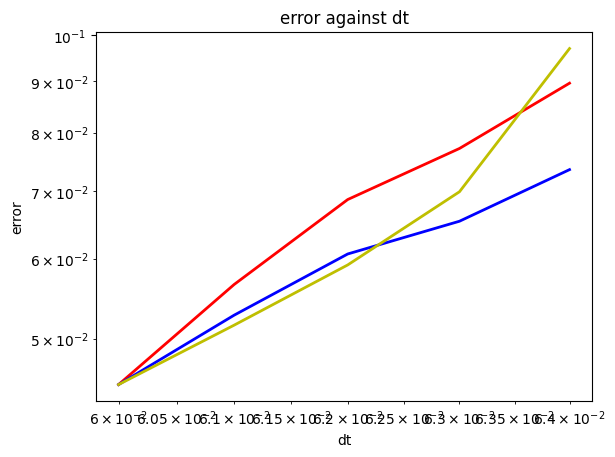

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#在误差对于步长变化最敏感的区域内分析
dt_logspace_array = [0.06,0.061,0.062,0.063,0.064]
dx_logspace_array = [0.0096,0.0097,0.0098,0.0099,0.01]

error_list_dx = np.zeros((3,5))
error_list_dt = np.zeros((3,5))

for i in range(5):
    error_list_dx[:,i] = wave_equation(dx_logspace_array[i], 0.01,1,False)

for i in range(5):
    error_list_dt[:,i] = wave_equation(0.06, dt_logspace_array[i],1,False)
plt.loglog(dt_logspace_array, error_list_dt[0,0:5], '-r', linewidth=2) # 红色实线——Lax
plt.loglog(dt_logspace_array, error_list_dt[1,0:5], '-b', linewidth=2) # 蓝色实线——Upwind
plt.loglog(dt_logspace_array, error_list_dt[2,0:5], '-y', linewidth=2) # 黄色实线——Lax-windroff


plt.title('error against dt')
plt.xlabel('dt')
plt.ylabel('error')
plt.show()
